<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_17_Taller_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Configuración: Importamos Librerias y Datos**

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
cr_loan = pd.read_excel('cr_loan.xlsx',sheet_name='cr_loan')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## **2. Entendimiento y Análisis Exploratorio de Datos**

### Qué tipo de variables tiene el dataset?

In [3]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
cr_loan.shape

(32581, 12)

In [6]:
cr_loan=cr_loan.drop_duplicates()
cr_loan.reset_index()
cr_loan.shape

(32416, 12)

### Qué tan material es el nro de defaults?

In [7]:
target_count = cr_loan['loan_status'].value_counts()
target_count

loan_status
0    25327
1     7089
Name: count, dtype: int64

# Buen_Pagador: 25327
# 1 Mora_12M: 7089
Bad rate: 0.21868830207305034


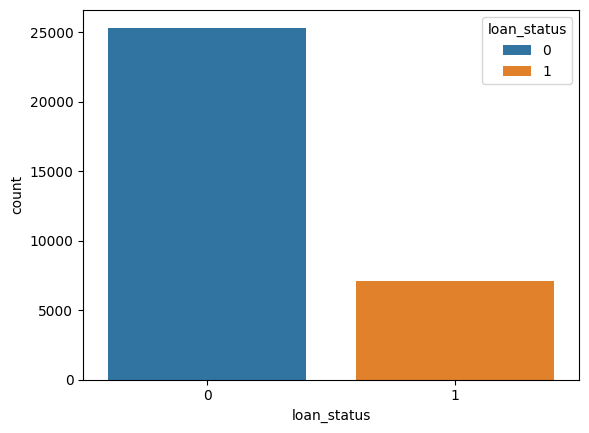

In [8]:
sns.countplot(data = cr_loan, x = "loan_status", hue="loan_status")
target_count = cr_loan.loan_status.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

## Hagamos el Análisis Univariado

#### Revisemos la cantidad de nulos y sus proporciones por variable

In [9]:
null_values = pd.concat([cr_loan.isnull().sum(), cr_loan.isnull().sum() / len(cr_loan)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,887,0.027363
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3095,0.095478
loan_status,0,0.000000
loan_percent_income,0,0.000000


#### Hasta aquí sabemos que **person_emp_length (2.7%)** y **loan_int_rate (9.5%)** tienen problemas de missing

#### Revisemos sus estadísticos básicos

In [10]:
cr_loan.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [11]:
cr_loan.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
person_home_ownership,32416,4,RENT,16378
loan_intent,32416,6,EDUCATION,6411
loan_grade,32416,7,A,10703
cb_person_default_on_file,32416,2,N,26686


#### Revisemos como se distribuye cada variable

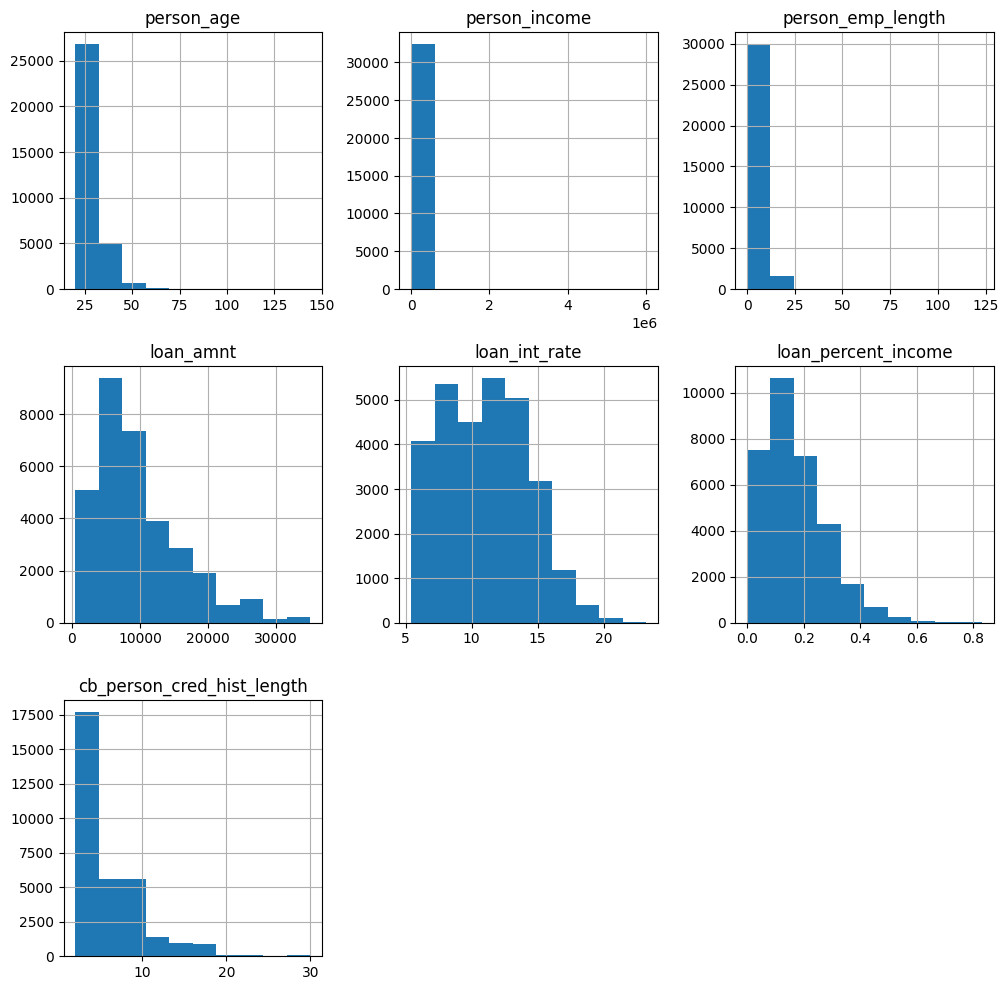

In [12]:
cr_loan.drop(columns = ['loan_status']).hist(figsize = (12, 12))
plt.show()

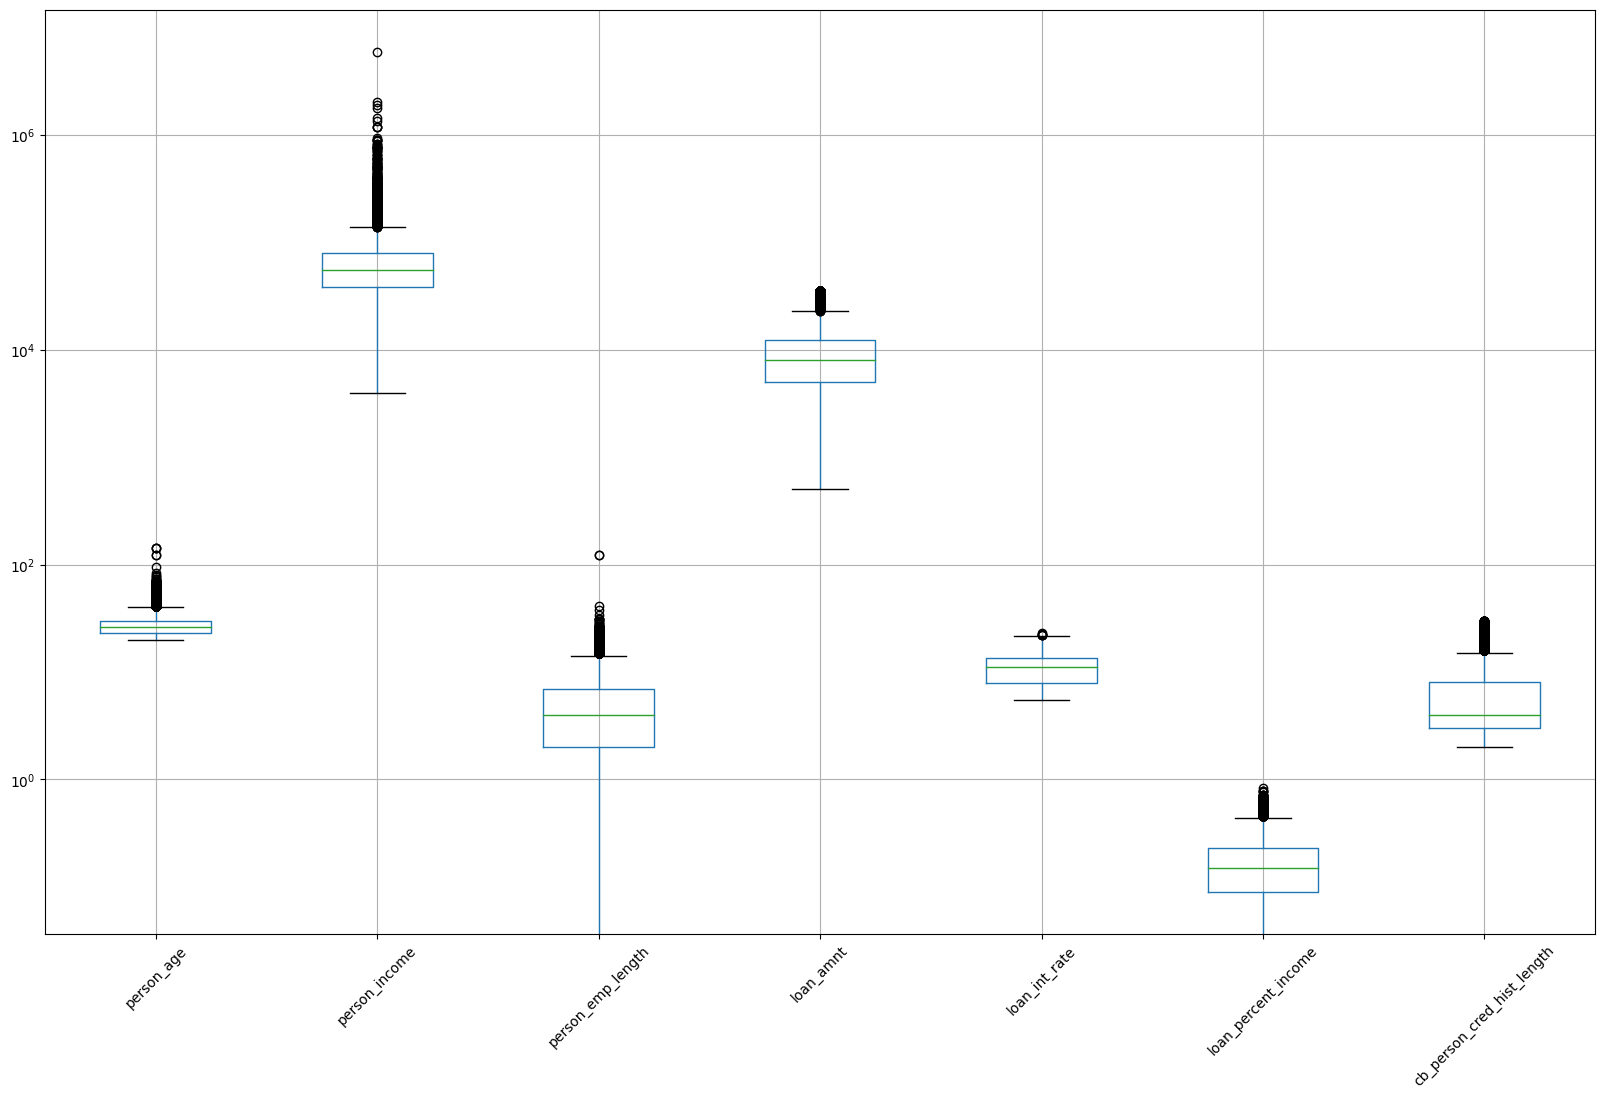

In [13]:
cr_loan.drop(columns = ['loan_status']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [14]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [15]:
outliers_col(cr_loan)

person_age | 0 | 1491
person_income | 0 | 1478
person_emp_length | 0 | 852
loan_amnt | 0 | 1679
loan_int_rate | 0 | 1
loan_status | 0 | 7089
loan_percent_income | 0 | 650
cb_person_cred_hist_length | 0 | 1139


## **3. Feature Engineering**

#### Iniciamos haciendo la partición de la muestra

In [16]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [17]:
pip install feature_engine

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cr_loan.drop("loan_status", axis=1),
    cr_loan["loan_status"],
    test_size=0.3,
    random_state=0,
    stratify=cr_loan["loan_status"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22691, 11), (9725, 11), (22691,), (9725,))

In [21]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.2186770085055749

In [22]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.2187146529562982

In [23]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [24]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

#### Las variables a tratar serían person_emp_length (2.7%) y loan_int_rate (9.5%) tienen problemas de missing

In [25]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer

In [26]:
imputer_1 = MeanMedianImputer(imputation_method="median", variables=['person_emp_length','loan_int_rate'])

In [27]:
imputer_1.fit(X_train)

MeanMedianImputer(variables=['person_emp_length', 'loan_int_rate'])

In [28]:
imputer_1.imputer_dict_

{'person_emp_length': 4.0, 'loan_int_rate': 10.99}

In [29]:
X_train_t = imputer_1.transform(X_train)
X_test_t = imputer_1.transform(X_test)

In [30]:
X_train_t.isnull().mean()

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [31]:
X_test_t.isnull().mean()

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

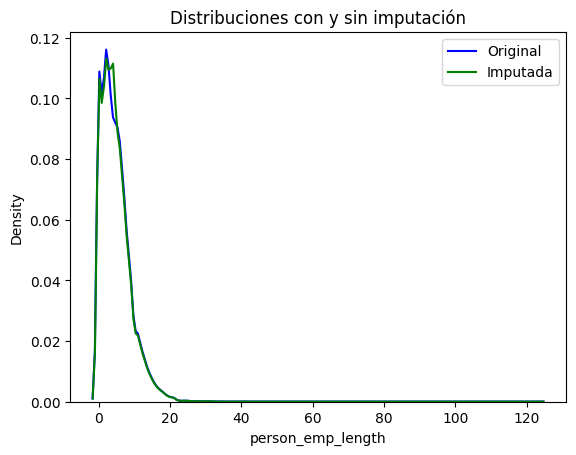

In [45]:
# Grafiquemos las variables imputadas y las originales para "person_emp_length"
fig, ax = plt.subplots()
sns.kdeplot(X_train['person_emp_length'], ax=ax, color='blue', label='Original')
sns.kdeplot(X_train_t['person_emp_length'], ax=ax, color='green', label='Imputada')
ax.legend(loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

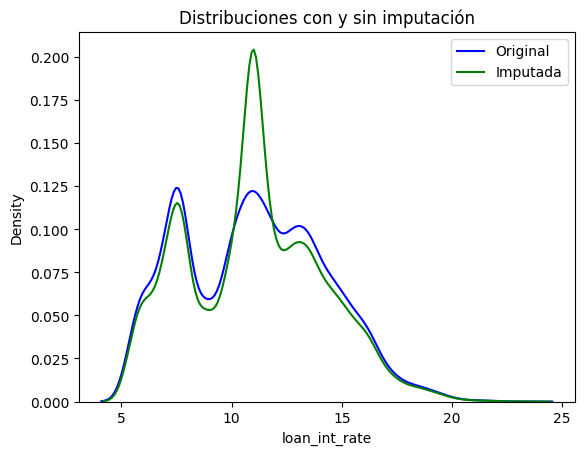

In [46]:
# Grafiquemos las variables imputadas y las originales para "loan_int_rate"
fig, ax = plt.subplots()
sns.kdeplot(X_train['loan_int_rate'], ax=ax, color='blue', label='Original')
sns.kdeplot(X_train_t['loan_int_rate'], ax=ax, color='green', label='Imputada')
ax.legend(loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

#### Experimentemos con un método de imputación basado en un modelo

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [49]:
imputer_dt = IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0)

In [50]:
imputer_dt.fit(X_train[var_num.columns])

IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                 random_state=0)

In [51]:
X_train_dt = imputer_dt.transform(X_train[var_num.columns])
X_test_dt = imputer_dt.transform(X_test[var_num.columns])

In [52]:
X_train_dt = pd.DataFrame(X_train_dt, columns = var_num.columns)
X_test_dt = pd.DataFrame(X_test_dt, columns = var_num.columns)

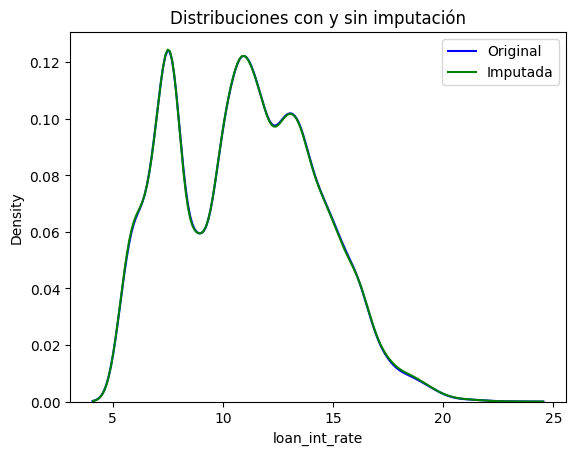

In [53]:
# Grafiquemos las variables imputadas y las originales para "loan_int_rate"
fig, ax = plt.subplots()
sns.kdeplot(X_train['loan_int_rate'], ax=ax, color='blue', label='Original')
sns.kdeplot(X_train_dt['loan_int_rate'], ax=ax, color='green', label='Imputada')
ax.legend(loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

In [54]:
from sklearn.compose import ColumnTransformer

In [55]:
pipe = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['person_emp_length'])
        ),
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),random_state=0), ['loan_int_rate'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [56]:
pipe.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['person_emp_length'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   random_state=0),
                                                  ['loan_int_rate'])],
                                   verbose_feature_names_out=False))])

In [57]:
X_train_t_p = pipe.transform(X_train)
X_test_t_p = pipe.transform(X_test)

In [58]:
X_train_t_p.isnull().mean()

loan_int_rate                 0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [59]:
X_test_t_p.isnull().mean()

loan_int_rate                 0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [69]:
X_train.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,5.774007,4.044089,2.00,3.00,4.00,8.00,30.00
loan_amnt,22691.0,9621.922789,6362.900120,500.00,5000.00,8000.00,12300.00,35000.00
loan_int_rate,20500.0,11.020260,3.233723,5.42,7.90,10.99,13.47,23.22
loan_percent_income,22691.0,0.170766,0.106789,0.00,0.09,0.15,0.23,0.83
person_age,22691.0,27.681107,6.313691,20.00,23.00,26.00,30.00,144.00
person_emp_length,22047.0,4.815258,4.110758,0.00,2.00,4.00,7.00,123.00
person_income,22691.0,65930.841479,64917.772766,4000.00,38500.00,55000.00,79000.00,6000000.00


In [70]:
X_train_t_p.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,5.774007,4.044089,2.00,3.00,4.00000,8.00,30.00
loan_amnt,22691.0,9621.922789,6362.900120,500.00,5000.00,8000.00000,12300.00,35000.00
loan_int_rate,22691.0,11.020260,3.073632,5.42,8.49,11.02026,13.11,23.22
loan_percent_income,22691.0,0.170766,0.106789,0.00,0.09,0.15000,0.23,0.83
person_age,22691.0,27.681107,6.313691,20.00,23.00,26.00000,30.00,144.00
person_emp_length,22691.0,4.792120,4.054262,0.00,2.00,4.00000,7.00,123.00
person_income,22691.0,65930.841479,64917.772766,4000.00,38500.00,55000.00000,79000.00,6000000.00


### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [73]:
# Examinemos esto en la muestra de train
for col in var_cat.columns:
    print('variable: ', col, ' nro de categorias: ', X_train_t_p[col].nunique())

variable:  person_home_ownership  nro de categorias:  4
variable:  loan_intent  nro de categorias:  6
variable:  loan_grade  nro de categorias:  7
variable:  cb_person_default_on_file  nro de categorias:  2


In [74]:
#Examinemos esto en la muestra de test
for col in var_cat.columns:
    print('variable: ', col, ' nro de categorias: ', X_test_t_p[col].nunique())

variable:  person_home_ownership  nro de categorias:  4
variable:  loan_intent  nro de categorias:  6
variable:  loan_grade  nro de categorias:  7
variable:  cb_person_default_on_file  nro de categorias:  2


In [75]:
# Analicemos la variable person_home_ownership
unique_to_train_set = [x for x in X_train_t_p.person_home_ownership.unique() if x not in X_test_t_p.person_home_ownership.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t_p.person_home_ownership.unique() if x not in X_train_t_p.person_home_ownership.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [76]:
# Analicemos la variable loan_grade
unique_to_train_set = [x for x in X_train_t_p.loan_grade.unique() if x not in X_test_t_p.loan_grade.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t_p.loan_grade.unique() if x not in X_train_t_p.loan_grade.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [77]:
# Analicemos la variable loan_intent
unique_to_train_set = [x for x in X_train_t_p.loan_intent.unique() if x not in X_test_t_p.loan_intent.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t_p.loan_intent.unique() if x not in X_train_t_p.loan_intent.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [78]:
# Analicemos la variable cb_person_default_on_file
unique_to_train_set = [x for x in X_train_t_p.cb_person_default_on_file.unique() if x not in X_test_t_p.cb_person_default_on_file.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t_p.cb_person_default_on_file.unique() if x not in X_train_t_p.cb_person_default_on_file.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


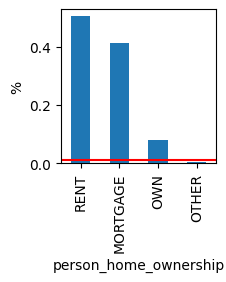

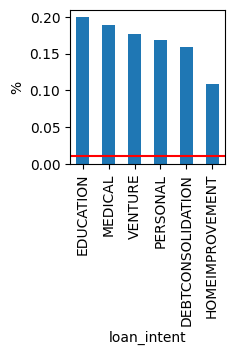

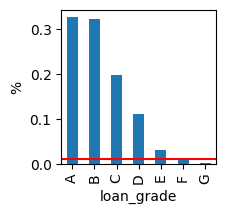

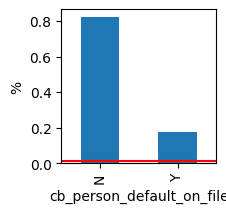

In [79]:
total = len(X_train_t_p)
for col in var_cat.columns:
    temp_df = pd.Series(X_train_t_p[col].value_counts() / total)
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize=(2,2))
    fig.set_xlabel(col)
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('%')
    plt.show()

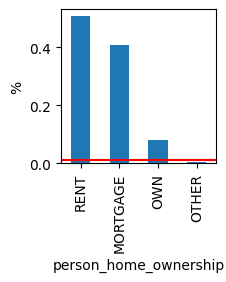

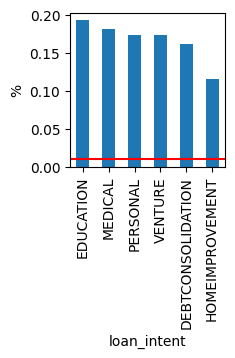

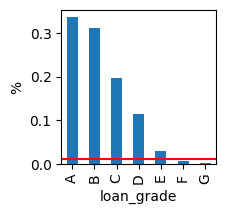

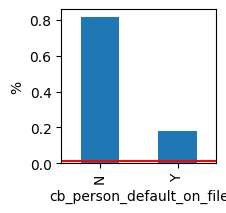

In [80]:
total = len(X_test_t_p)
for col in var_cat.columns:
    temp_df = pd.Series(X_test_t_p[col].value_counts() / total)
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize=(2,2))
    fig.set_xlabel(col)
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('%')
    plt.show()

#### En esta sección no vamos a realizar ningún tratamiento de casos raros dado que la cardinalidad es baja

### 3.3 Tratamiento de outliers

In [81]:
X_train_t_p.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,5.774007,4.044089,2.00,3.00,4.00000,8.00,30.00
loan_amnt,22691.0,9621.922789,6362.900120,500.00,5000.00,8000.00000,12300.00,35000.00
loan_int_rate,22691.0,11.020260,3.073632,5.42,8.49,11.02026,13.11,23.22
loan_percent_income,22691.0,0.170766,0.106789,0.00,0.09,0.15000,0.23,0.83
person_age,22691.0,27.681107,6.313691,20.00,23.00,26.00000,30.00,144.00
person_emp_length,22691.0,4.792120,4.054262,0.00,2.00,4.00000,7.00,123.00
person_income,22691.0,65930.841479,64917.772766,4000.00,38500.00,55000.00000,79000.00,6000000.00


In [82]:
outliers_col(X_train_t_p)

loan_int_rate | 0 | 40
person_age | 0 | 1012
person_income | 0 | 1085
person_emp_length | 0 | 603
loan_amnt | 0 | 1199
loan_percent_income | 0 | 453
cb_person_cred_hist_length | 0 | 792


### Revisando los casos, vamos a tratar los outliers, **person_age** y **person_emp_length** y **cb_person_cred_hist_length** sobre su cola derecha, y **person_income** sobre sus dos colas

In [83]:
from feature_engine.outliers import Winsorizer
capper_1 = Winsorizer(
    variables=['person_age','person_emp_length','cb_person_cred_hist_length'],
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper_1.fit(X_train_t_p)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['person_age', 'person_emp_length',
                      'cb_person_cred_hist_length'])

In [84]:
X_train_t_p2 = capper_1.transform(X_train_t_p)
X_test_t_p2 = capper_1.transform(X_test_t_p)

In [85]:
capper_2 = Winsorizer(
    variables=['person_income'],
    capping_method="quantiles",
    tail="both",
    fold=0.01,
)
capper_2.fit(X_train_t_p2)

Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
           variables=['person_income'])

In [86]:
X_train_t_p3 = capper_2.transform(X_train_t_p2)
X_test_t_p3 = capper_2.transform(X_test_t_p2)

In [87]:
X_train_t_p3.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,5.715834,3.812425,2.00,3.00,4.00000,8.00,17.00
loan_amnt,22691.0,9621.922789,6362.900120,500.00,5000.00,8000.00000,12300.00,35000.00
loan_int_rate,22691.0,11.020260,3.073632,5.42,8.49,11.02026,13.11,23.22
loan_percent_income,22691.0,0.170766,0.106789,0.00,0.09,0.15000,0.23,0.83
person_age,22691.0,27.607554,5.893929,20.00,23.00,26.00000,30.00,50.00
person_emp_length,22691.0,4.753942,3.843370,0.00,2.00,4.00000,7.00,17.10
person_income,22691.0,64215.947600,37424.189204,14400.00,38500.00,55000.00000,79000.00,225000.00


In [88]:
X_test_t_p3.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,9725.0,5.834036,3.839811,2.00,3.00,4.00000,8.00,17.00
loan_amnt,9725.0,9528.334190,6227.828001,500.00,5000.00,8000.00000,12000.00,35000.00
loan_int_rate,9725.0,11.011230,3.105031,5.42,8.00,11.02026,13.11,22.11
loan_percent_income,9725.0,0.169046,0.106861,0.00,0.09,0.15000,0.23,0.77
person_age,9725.0,27.820566,5.981442,20.00,23.00,26.00000,30.00,50.00
person_emp_length,9725.0,4.672946,3.880203,0.00,2.00,4.00000,7.00,17.10
person_income,9725.0,64782.784679,38520.993746,14400.00,39000.00,55000.00000,80000.00,225000.00


### 3.4 Escalado de las variables

In [89]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t_p3[var_num.columns])
X_train_t_p4 = scaler.transform(X_train_t_p3[var_num.columns])
X_test_t_p4 = scaler.transform(X_test_t_p3[var_num.columns])

In [90]:
X_train_t_p4.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,3.431669e-01,0.762485,-0.400000,-0.200000,0.0,0.800000,2.600000
loan_amnt,22691.0,2.221812e-01,0.871630,-1.027397,-0.410959,0.0,0.589041,3.698630
loan_int_rate,22691.0,-6.810764e-17,0.665288,-1.212177,-0.547675,0.0,0.452325,2.640636
loan_percent_income,22691.0,1.483282e-01,0.762780,-1.071429,-0.428571,0.0,0.571429,4.857143
person_age,22691.0,2.296505e-01,0.841990,-0.857143,-0.428571,0.0,0.571429,3.428571
person_emp_length,22691.0,1.507884e-01,0.768674,-0.800000,-0.400000,0.0,0.600000,2.620000
person_income,22691.0,2.275543e-01,0.924054,-1.002469,-0.407407,0.0,0.592593,4.197531


#### 3.5 Actualizamos nuestro pipeline

In [91]:
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['person_emp_length'])
        ),
        (
            "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),max_iter=100,random_state=0), ['loan_int_rate'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (
            "capper_1",
         Winsorizer(variables=['person_age','person_emp_length','cb_person_cred_hist_length'],capping_method="quantiles",tail="right",fold=0.01)
        ),
        (
            "capper_2",
         Winsorizer(variables=['person_income'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        )
    ]
)

In [92]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['person_emp_length'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  ['loan_int_rate'])],
                                   verbose_feature_names_out=False)),
                ('capper_1',
                 Winsorizer(capping_method='qu...
                ('capper_2',
                 Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
                            variables=['person_income'])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])],
                                   verbose_feature_names_out=False))])

In [93]:
X_train_t_p5 = pipe_2.transform(X_train)
X_test_t_p5 = pipe_2.transform(X_test)

In [94]:
X_train_t_p4.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,3.431669e-01,0.762485,-0.400000,-0.200000,0.0,0.800000,2.600000
loan_amnt,22691.0,2.221812e-01,0.871630,-1.027397,-0.410959,0.0,0.589041,3.698630
loan_int_rate,22691.0,-6.810764e-17,0.665288,-1.212177,-0.547675,0.0,0.452325,2.640636
loan_percent_income,22691.0,1.483282e-01,0.762780,-1.071429,-0.428571,0.0,0.571429,4.857143
person_age,22691.0,2.296505e-01,0.841990,-0.857143,-0.428571,0.0,0.571429,3.428571
person_emp_length,22691.0,1.507884e-01,0.768674,-0.800000,-0.400000,0.0,0.600000,2.620000
person_income,22691.0,2.275543e-01,0.924054,-1.002469,-0.407407,0.0,0.592593,4.197531


In [95]:
X_train_t_p5.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
cb_person_cred_hist_length,22691.0,3.431669e-01,0.762485,-0.400000,-0.200000,0.0,0.800000,2.600000
loan_amnt,22691.0,2.221812e-01,0.871630,-1.027397,-0.410959,0.0,0.589041,3.698630
loan_int_rate,22691.0,-6.810764e-17,0.665288,-1.212177,-0.547675,0.0,0.452325,2.640636
loan_percent_income,22691.0,1.483282e-01,0.762780,-1.071429,-0.428571,0.0,0.571429,4.857143
person_age,22691.0,2.296505e-01,0.841990,-0.857143,-0.428571,0.0,0.571429,3.428571
person_emp_length,22691.0,1.507884e-01,0.768674,-0.800000,-0.400000,0.0,0.600000,2.620000
person_income,22691.0,2.275543e-01,0.924054,-1.002469,-0.407407,0.0,0.592593,4.197531


## **4. Feature Selection**
Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

#### Empecemos discretizando las variables numéricas

In [96]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [97]:
disc1 = EqualFrequencyDiscretiser(q=5,variables=list(var_num.columns),return_boundaries=True)
disc1.fit(X_train_t_p5[var_num.columns])

EqualFrequencyDiscretiser(q=5, return_boundaries=True,
                          variables=['person_age', 'person_income',
                                     'person_emp_length', 'loan_amnt',
                                     'loan_int_rate', 'loan_percent_income',
                                     'cb_person_cred_hist_length'])

In [98]:
X_train_t_p5_numdisc=disc1.transform(X_train_t_p5[var_num.columns])
X_test_t_p5_numdisc=disc1.transform(X_test_t_p5[var_num.columns])

In [99]:
X_train_t_p5_numdisc.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
8224,"(-inf, -0.429]","(-0.148, 0.208]","(0.2, 0.8]","(-0.493, -0.164]","(0.102, 0.561]","(-0.5, -0.214]","(-inf, -0.2]"
10004,"(-0.429, -0.143]","(0.208, 0.765]","(-0.6, -0.2]","(-0.164, 0.274]","(-inf, -0.68]","(-0.5, -0.214]","(-inf, -0.2]"
21434,"(0.143, 0.857]","(-0.494, -0.148]","(0.2, 0.8]","(-0.493, -0.164]","(-inf, -0.68]","(-0.5, -0.214]","(0.2, 1.0]"
14135,"(-0.429, -0.143]","(0.765, inf]","(0.8, inf]","(-0.164, 0.274]","(-0.68, -0.0866]","(-inf, -0.5]","(-inf, -0.2]"
13979,"(-0.429, -0.143]","(-0.148, 0.208]","(-0.2, 0.2]","(0.274, 0.911]","(-0.0866, 0.102]","(0.214, 0.714]","(-inf, -0.2]"


In [100]:
tot_train_t=pd.concat([X_train_t_p5_numdisc, X_train_t_p5[var_cat.columns], y_train], axis=1)
tot_train_t.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status
8224,"(-inf, -0.429]","(-0.148, 0.208]","(0.2, 0.8]","(-0.493, -0.164]","(0.102, 0.561]","(-0.5, -0.214]","(-inf, -0.2]",MORTGAGE,MEDICAL,B,N,0
10004,"(-0.429, -0.143]","(0.208, 0.765]","(-0.6, -0.2]","(-0.164, 0.274]","(-inf, -0.68]","(-0.5, -0.214]","(-inf, -0.2]",RENT,MEDICAL,A,N,0
21434,"(0.143, 0.857]","(-0.494, -0.148]","(0.2, 0.8]","(-0.493, -0.164]","(-inf, -0.68]","(-0.5, -0.214]","(0.2, 1.0]",MORTGAGE,VENTURE,A,N,0
14135,"(-0.429, -0.143]","(0.765, inf]","(0.8, inf]","(-0.164, 0.274]","(-0.68, -0.0866]","(-inf, -0.5]","(-inf, -0.2]",MORTGAGE,EDUCATION,B,N,0
13979,"(-0.429, -0.143]","(-0.148, 0.208]","(-0.2, 0.2]","(0.274, 0.911]","(-0.0866, 0.102]","(0.214, 0.714]","(-inf, -0.2]",RENT,HOMEIMPROVEMENT,B,N,0


In [101]:
tot_train_t.shape, X_train_t_p5_numdisc.shape, X_train_t_p5[var_cat.columns].shape, y_train.shape

((22691, 12), (22691, 7), (22691, 4), (22691,))

#### Ahora las funciones necesarias para calcular el WOE por atributo y el IV por variable

In [102]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [103]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [104]:
getFeatureIV_Importance(tot_train_t,tot_train_t.columns,"loan_status")

,Feature,IV
9,loan_grade,0.820129
5,loan_percent_income,0.715930
4,loan_int_rate,0.584838
1,person_income,0.460757
7,person_home_ownership,0.374634
10,cb_person_default_on_file,0.155984
8,loan_intent,0.097012
3,loan_amnt,0.076558
2,person_emp_length,0.048659
6,cb_person_cred_hist_length,0.007699


### A partir de esto, nos quedamos con las variables que tengan un IV mayor a 2% (que es el umbral mínimo) y si bien podemos debatir sobre aquellas variables que alcanzaron mas del 50% (umbral máximo antes de ser considerado sospechosa) en esta ocasion solo eliminaremos la variable loan_grade

In [105]:
sel_vars=['loan_percent_income','loan_int_rate','person_income','person_home_ownership','cb_person_default_on_file',
          'loan_intent','loan_amnt','person_emp_length']

#### Veamos como se ven las relaciones entre los atributos de cada variable y el log(odds) o WOE

In [106]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [107]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'loan_percent_income', 'loan_status')

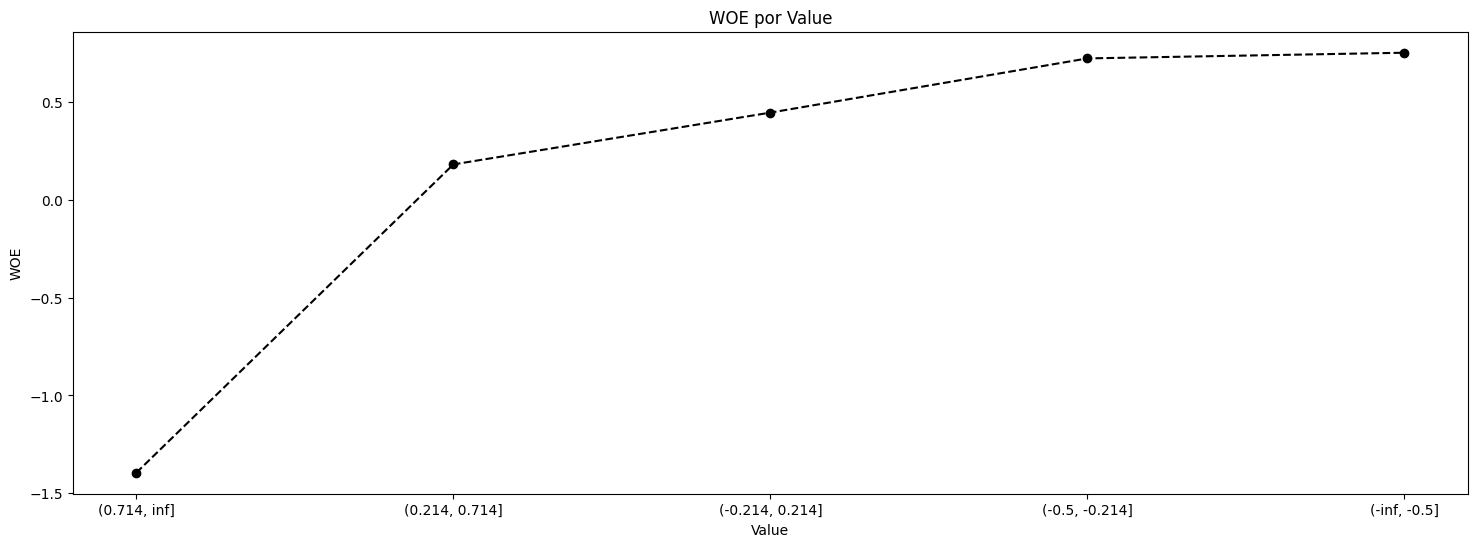

In [108]:
plot_by_woe(ReporteWoe_v1)

In [110]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'loan_int_rate', 'loan_status')

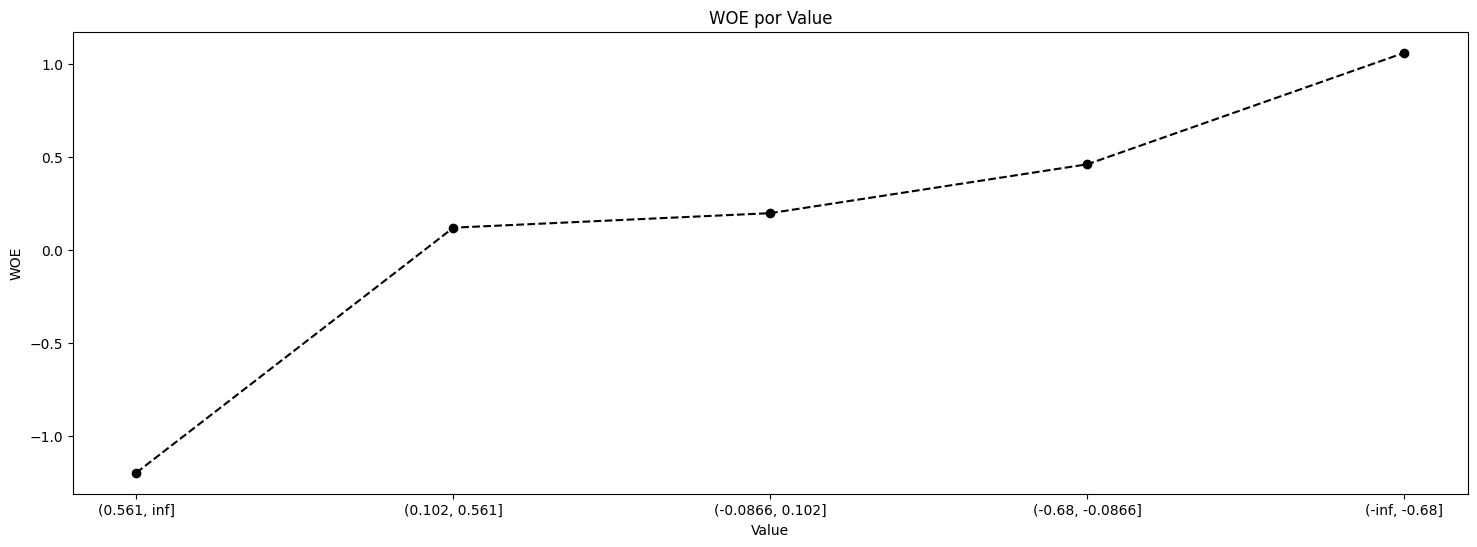

In [111]:
plot_by_woe(ReporteWoe_v2)

In [112]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'person_income', 'loan_status')

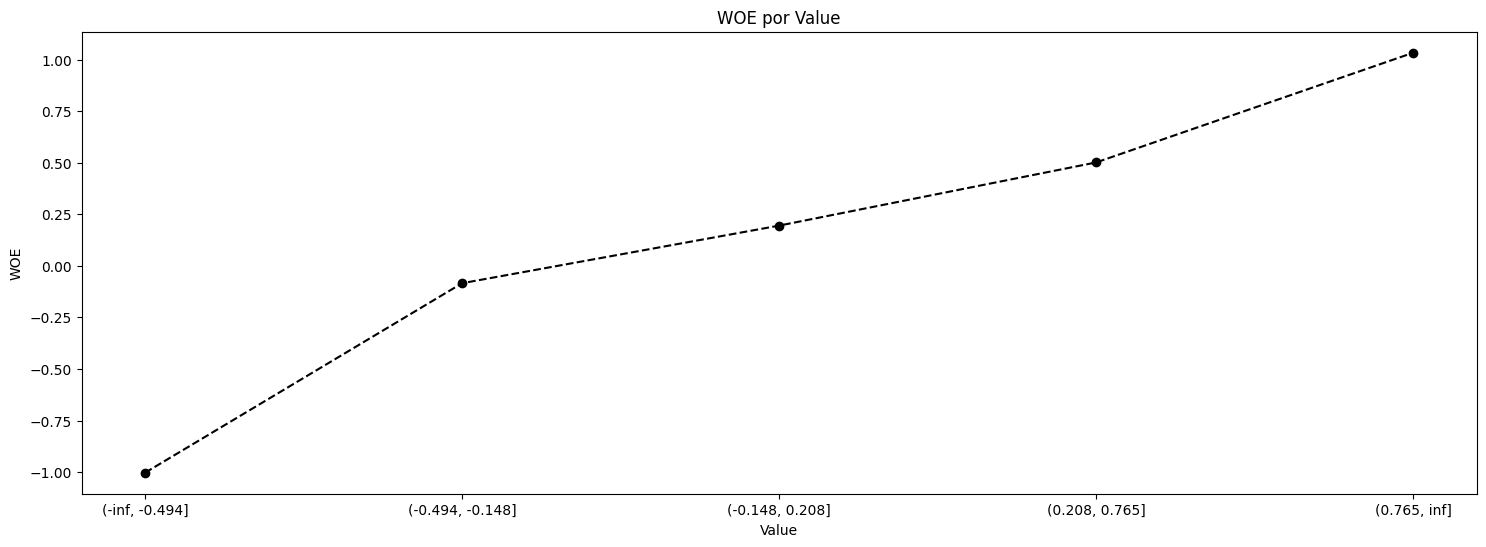

In [113]:
plot_by_woe(ReporteWoe_v3)

In [114]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'person_home_ownership', 'loan_status')

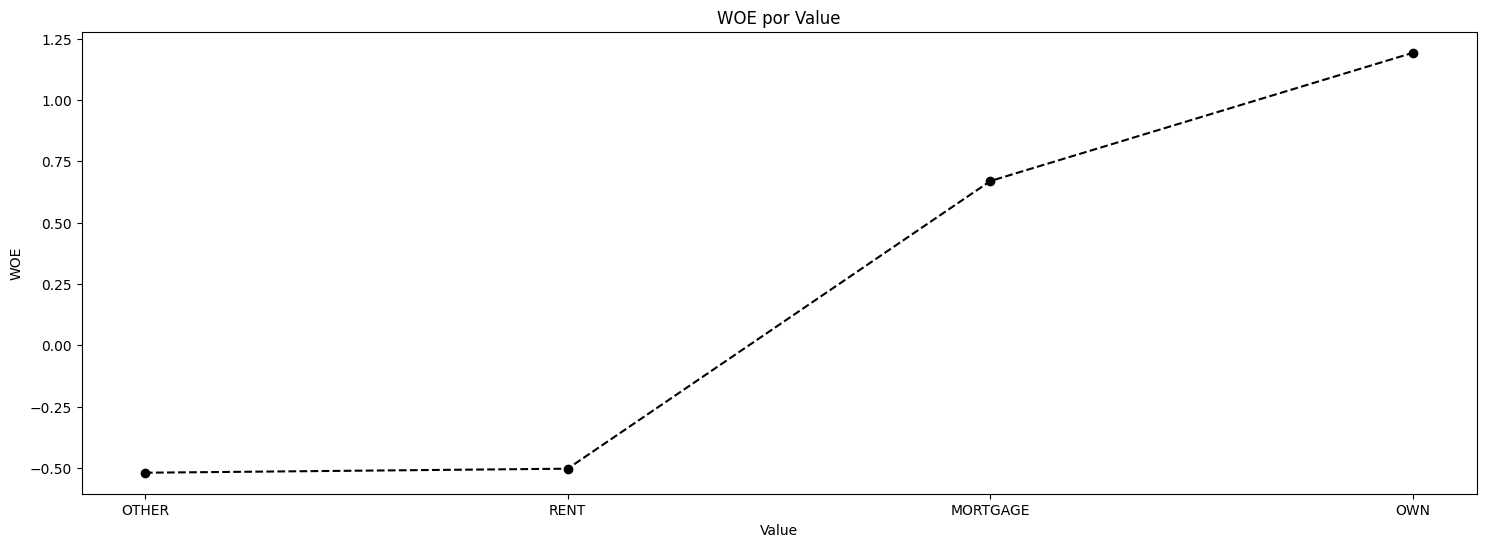

In [115]:
plot_by_woe(ReporteWoe_v4)

In [116]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'cb_person_default_on_file', 'loan_status')

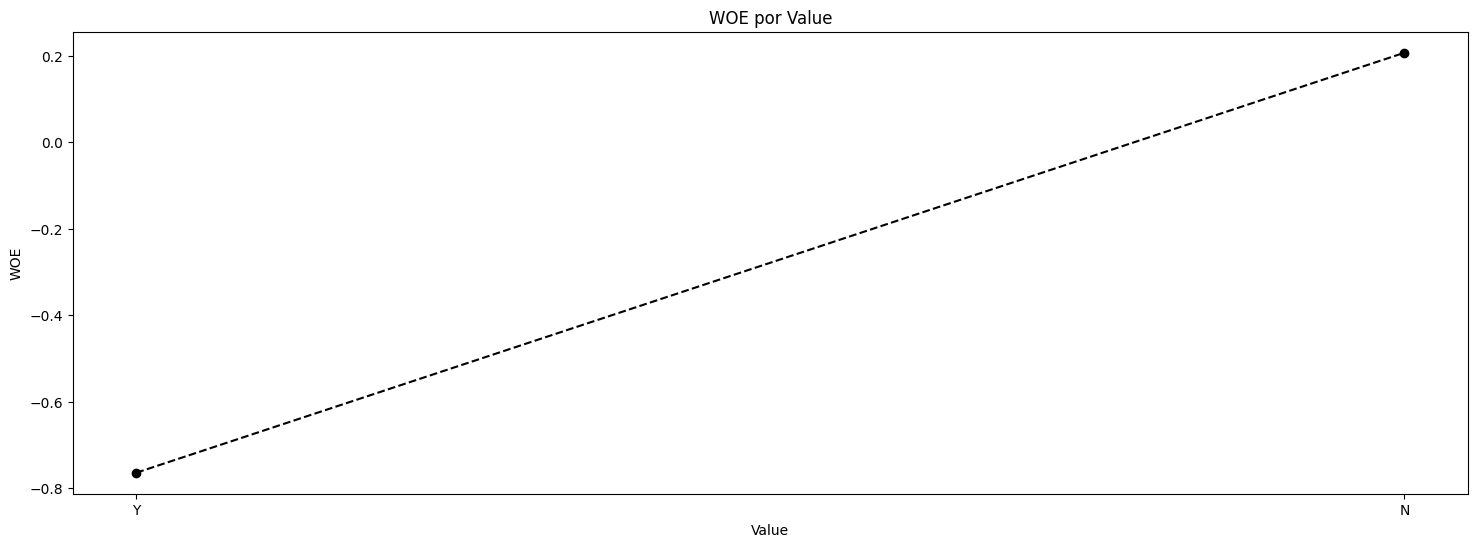

In [117]:
plot_by_woe(ReporteWoe_v5)

In [118]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'loan_intent', 'loan_status')

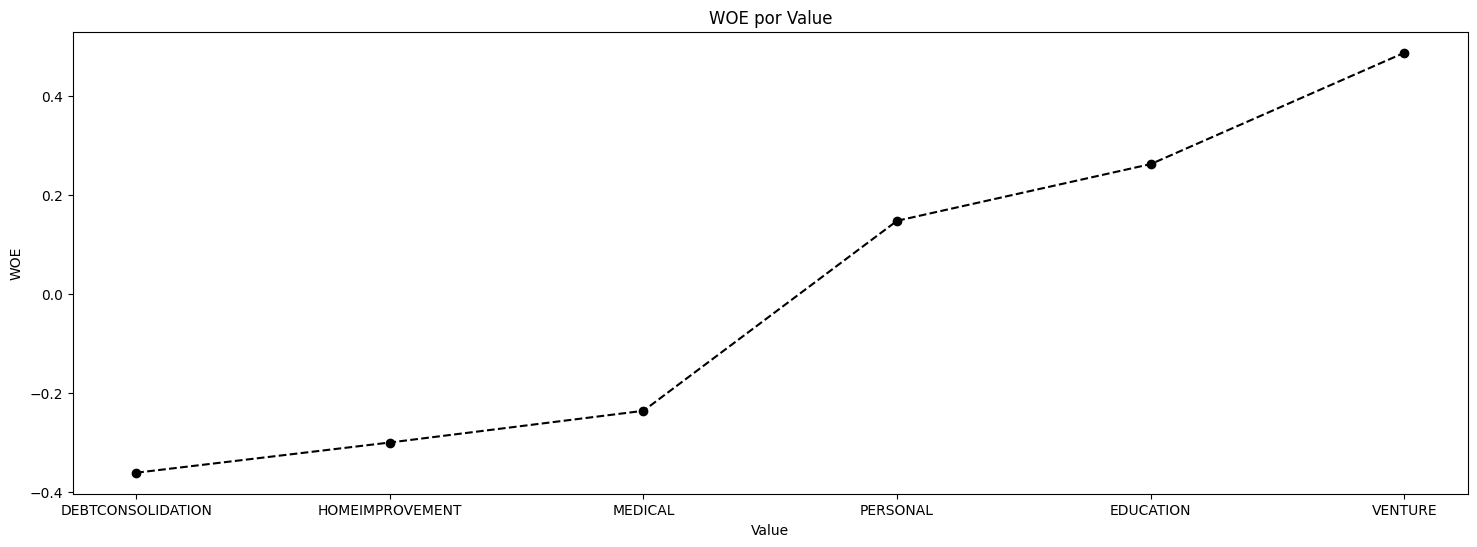

In [119]:
plot_by_woe(ReporteWoe_v6)

In [120]:
IV_v7, ReporteWoe_v7=calculate_woe_iv(tot_train_t, 'loan_amnt', 'loan_status')

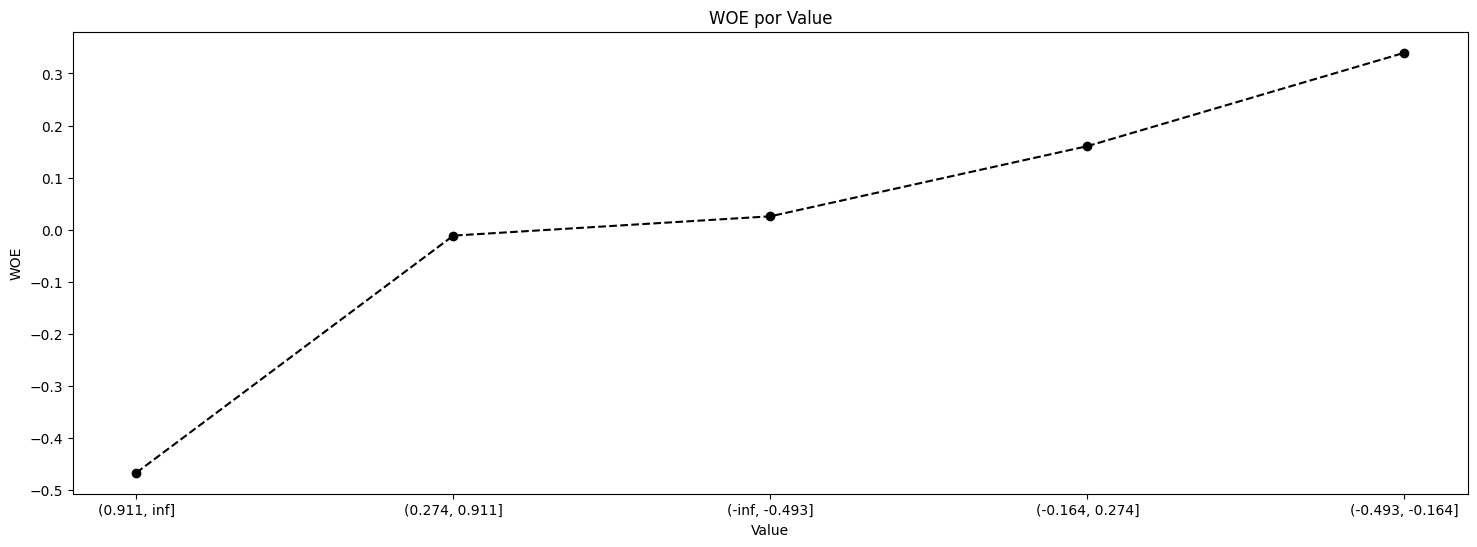

In [121]:
plot_by_woe(ReporteWoe_v7)

In [122]:
IV_v8, ReporteWoe_v8=calculate_woe_iv(tot_train_t, 'person_emp_length', 'loan_status')

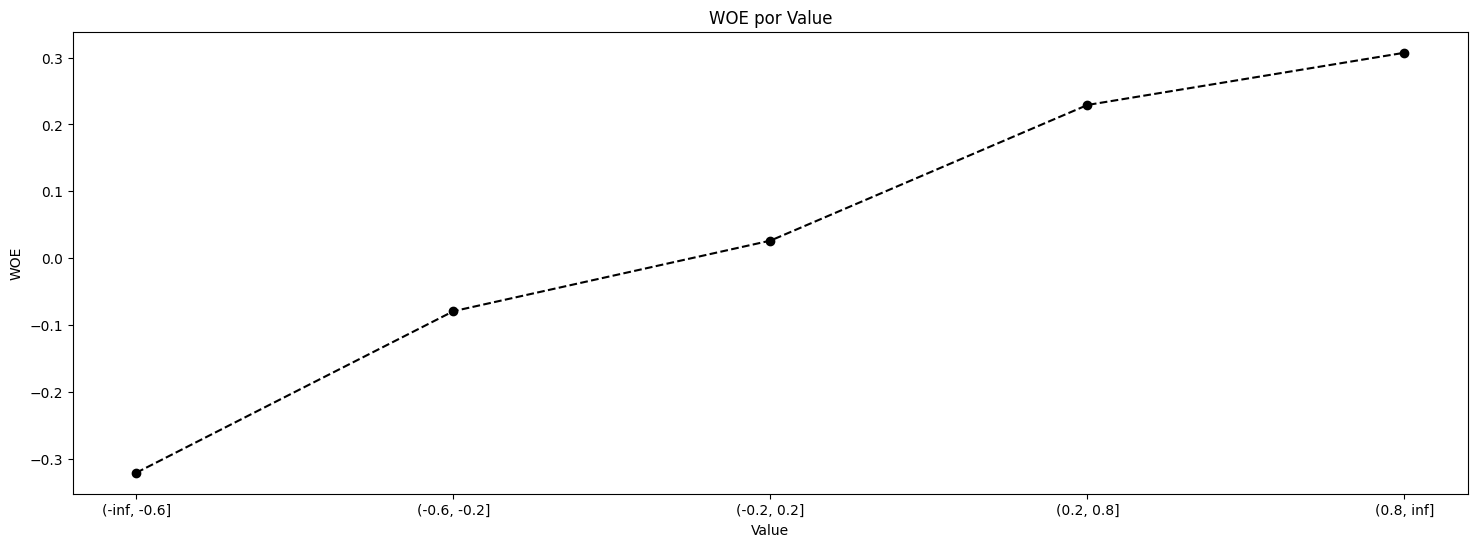

In [123]:
plot_by_woe(ReporteWoe_v8)

#### Codificamos las variables categóricas para ingresarlas al modelo

In [124]:
sel_vars

['loan_percent_income',
 'loan_int_rate',
 'person_income',
 'person_home_ownership',
 'cb_person_default_on_file',
 'loan_intent',
 'loan_amnt',
 'person_emp_length']

In [125]:
sel_vars_cat=['person_home_ownership','cb_person_default_on_file','loan_intent']

In [126]:
sel_vars_num=['loan_percent_income','loan_int_rate','person_income','loan_amnt','person_emp_length']

In [127]:
from feature_engine.encoding import WoEEncoder

In [128]:
encoder_1 = WoEEncoder(variables=sel_vars_cat,
                       fill_value=0) #ignore_format=False
encoder_1.fit(X_train_t_p5[sel_vars_cat], y_train)

WoEEncoder(fill_value=0,
           variables=['person_home_ownership', 'cb_person_default_on_file',
                      'loan_intent'])

In [129]:
X_train_t_p5_cat_woe_enc = encoder_1.transform(X_train_t_p5[sel_vars_cat])
X_test_t_p5_cat_woe_enc = encoder_1.transform(X_test_t_p5[sel_vars_cat])

In [130]:
X_train_t_p5_cat_woe_enc.head()

,person_home_ownership,cb_person_default_on_file,loan_intent
8224,-0.669354,-0.206678,0.236466
10004,0.503223,-0.206678,0.236466
21434,-0.669354,-0.206678,-0.486875
14135,-0.669354,-0.206678,-0.261880
13979,0.503223,-0.206678,0.300535


In [131]:
encoder_2 = WoEEncoder(variables=sel_vars_num,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t_p5_numdisc[sel_vars_num], y_train)

WoEEncoder(fill_value=0,
           variables=['loan_percent_income', 'loan_int_rate', 'person_income',
                      'loan_amnt', 'person_emp_length'])

In [132]:
X_train_t_p5_num_woe_enc = encoder_2.transform(X_train_t_p5_numdisc[sel_vars_num])
X_test_t_p5_num_woe_enc = encoder_2.transform(X_test_t_p5_numdisc[sel_vars_num])

In [133]:
X_train_t_p5_num_woe_enc.head()

,loan_percent_income,loan_int_rate,person_income,loan_amnt,person_emp_length
8224,-0.722679,-0.120294,-0.194886,-0.339732,-0.229107
10004,-0.722679,-1.062574,-0.501125,-0.160473,0.079573
21434,-0.722679,-1.062574,0.084339,-0.339732,-0.229107
14135,-0.751698,-0.461854,-1.032862,-0.160473,-0.307306
13979,-0.180843,-0.198538,-0.194886,0.011232,-0.026071


### Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [134]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [135]:
corr_features = correlation(X_train_t_p5[sel_vars_num], 0.5)
len(set(corr_features))

0.5782506154799009 loan_amnt loan_percent_income


1

<Axes: >

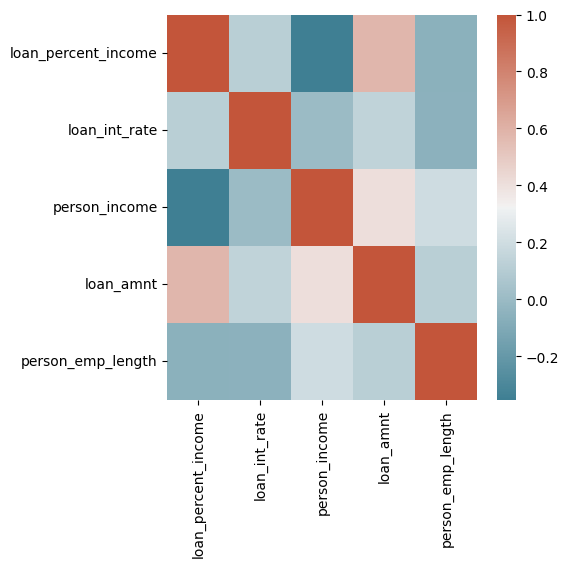

In [136]:
corrmat2 = X_train_t_p5[sel_vars_num].corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat2, cmap=cmap)

### Con lo visto en este análisis de correlaciones, vamos a quedarnos solo con una de estas variables, que será la de mayor IV, es decir, **loan_percent_income**

In [137]:
sel_vars_2=['loan_percent_income','loan_int_rate','person_income','person_home_ownership','cb_person_default_on_file',
            'loan_intent','person_emp_length']

In [138]:
sel_vars_num_2=['loan_percent_income','loan_int_rate','person_income','person_emp_length']

### Actualicemos nuestro pipeline de Feature Engineering antes de iniciar el entrenamiento del modelo

In [139]:
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['person_emp_length'])
        ),
        (
            "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),max_iter=100,random_state=0), ['loan_int_rate'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (
            "capper_1",
         Winsorizer(variables=['person_age','person_emp_length','cb_person_cred_hist_length'],capping_method="quantiles",tail="right",fold=0.01)
        ),
        (
            "capper_2",
         Winsorizer(variables=['person_income'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (
            "encoder_1",
            WoEEncoder(variables=['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file'], fill_value=0)
        ),
    ]
)

In [140]:
pipe_3.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['person_emp_length'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  ['loan_int_rate'])],
                                   verbose_feature_names_out=False)),
                ('capper_1',
                 Winsorizer(capping_method='qu...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])],
                                   verbose_feature_names_out=False)),
                ('encoder_1',
                 WoEEncoder(fill_value=0,
                            variables=['person_home_ownership', 'loan_intent',
                                       'loan_grade',
                                       'cb_person_default_on_file']))])

In [141]:
X_train_t_p6 = pipe_3.transform(X_train)
X_test_t_p6 = pipe_3.transform(X_test)

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [143]:
logit = LogisticRegression()
logit.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_logit = logit.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_logit = logit.predict_proba(X_test_t_p6[sel_vars_2])
print('Logit Train roc_auc: ', roc_auc_score(y_train, pred_train_logit[:,1]), 'Logit Train GINI: ', 2*roc_auc_score(y_train, pred_train_logit[:,1])-1)
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)

Logit Train roc_auc:  0.8429182152115113 Logit Train GINI:  0.6858364304230227
Logit Test roc_auc:  0.8508978372924456 Logit Test GINI:  0.7017956745848912


In [144]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.999999994316328 RF Train GINI:  0.999999988632656
RF Test roc_auc:  0.9213448581537245 RF Test GINI:  0.8426897163074489


In [145]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.9480544381645931 GBC Train GINI:  0.8961088763291862
GBC Test roc_auc:  0.9367177206086821 GBC Test GINI:  0.8734354412173642


## **Optimización de Hiperparámetros**

In [146]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import RandomizedSearchCV

### **Random Forest**

In [147]:
# Seteamos el modelo
rf = RandomForestClassifier(random_state=39)

# Definimos el espacio de hiperparámetros
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene los mejores hiperparámetros
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [148]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.880365,0.001155,0.878634,0.007178
1,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.880076,0.001598,0.878258,0.007592
2,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.879154,0.001713,0.877365,0.007625
3,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.878576,0.001723,0.876896,0.007479
4,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.878405,0.001499,0.876700,0.007357
5,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.869533,0.001530,0.868068,0.007605
6,"{'max_depth': 4, 'min_samples_split': 0.377440...",0.868593,0.002357,0.867104,0.007702
7,"{'max_depth': 4, 'min_samples_split': 0.309778...",0.868646,0.002030,0.866957,0.007911
8,"{'max_depth': 4, 'min_samples_split': 0.429492...",0.867797,0.002394,0.866611,0.008212
9,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.866910,0.001735,0.865560,0.008032


Text(0.5, 0, 'Hyperparameter space')

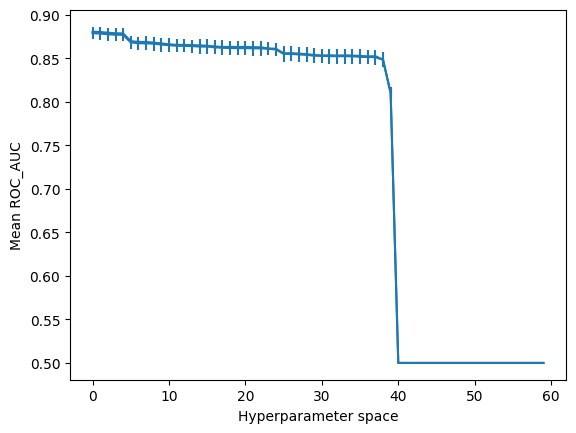

In [149]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [150]:
rf = RandomForestClassifier(max_depth=4, min_samples_split=0.07685550174624711, n_estimators= 155, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.879570800467216 RF Train GINI:  0.7591416009344321
RF Test roc_auc:  0.8847590357643668 RF Test GINI:  0.7695180715287335


### **Gradient Boosting**

In [151]:
# Seteamos el modelo
gbc = GradientBoostingClassifier(random_state=0)

# Determina el espacio de hiperparámetros
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_gbc = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc = reg_gbc.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene mejores hiperparámetros
search_gbc.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [152]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.936550,0.001065,0.926678,0.004052
1,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.933134,0.000655,0.923863,0.004178
2,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.923426,0.000581,0.917013,0.005336
3,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.922464,0.000762,0.916467,0.005722
4,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.923607,0.001019,0.915971,0.005938
5,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.921340,0.000757,0.914703,0.005681
6,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.915465,0.001945,0.910740,0.004919
7,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.915797,0.000957,0.910279,0.005748
8,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.912889,0.000378,0.908254,0.006626
9,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.912558,0.001120,0.908215,0.005905


Text(0.5, 0, 'Hyperparameter space')

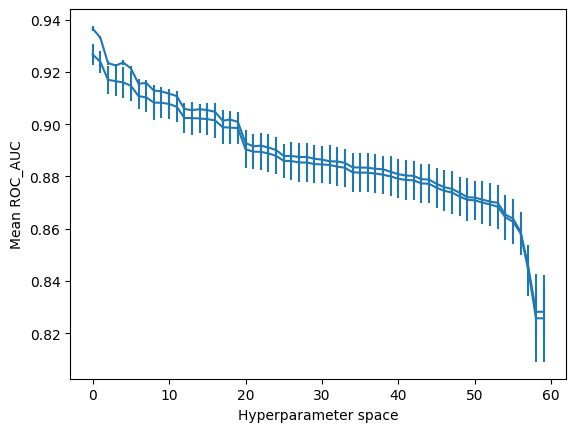

In [153]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [154]:
gbc = GradientBoostingClassifier(max_depth=4, min_samples_split=0.07685550174624711, n_estimators=155, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.9365961668543301 GBC Train GINI:  0.8731923337086602
GBC Test roc_auc:  0.9300140288817251 GBC Test GINI:  0.8600280577634503


### *Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?*

In [155]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Logit Test roc_auc:  0.8508978372924456 Logit Test GINI:  0.7017956745848912
RF Test roc_auc:  0.8847590357643668 RF Test GINI:  0.7695180715287335
GBC Test roc_auc:  0.9300140288817251 GBC Test GINI:  0.8600280577634503


#### FINALMENTE: Se puede apreciar una diferencia relevante entre los 3 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de **Gradient Boosting**

## **6. Evaluación del Modelo**

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
br_test=y_test.value_counts() / len(y_test)
br_test

loan_status
0    0.781285
1    0.218715
Name: count, dtype: float64

In [158]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [159]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t_p6[sel_vars_2])))

Accuracy Baseline test:  0.7812853470437018
Accuracy GBC test: 0.9142416452442159


In [160]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [161]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t_p6[sel_vars_2])))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, GBC test: 0.825615282669715


## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [162]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [163]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, gbc.predict(X_test_t_p6[sel_vars_2]))

print('Precision: ', precision[1:])
print('Recall: ', recall[1:])
print('F1-score: ', fscore[1:])

Precision:  [0.91736604]
Recall:  [0.6680771]
F1-score:  [0.77312296]


### *Matriz de Confusión*

TN | FP

FN | TP

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
confusion_matrix(y_test, gbc.predict(X_test_t_p6[sel_vars_2]), labels=[0,1])

array([[7470,  128],
       [ 706, 1421]])

### *Identificamos un punto de corte óptimo que maximice el F1 Score*

In [166]:
from yellowbrick.classifier import (
    DiscriminationThreshold,
)

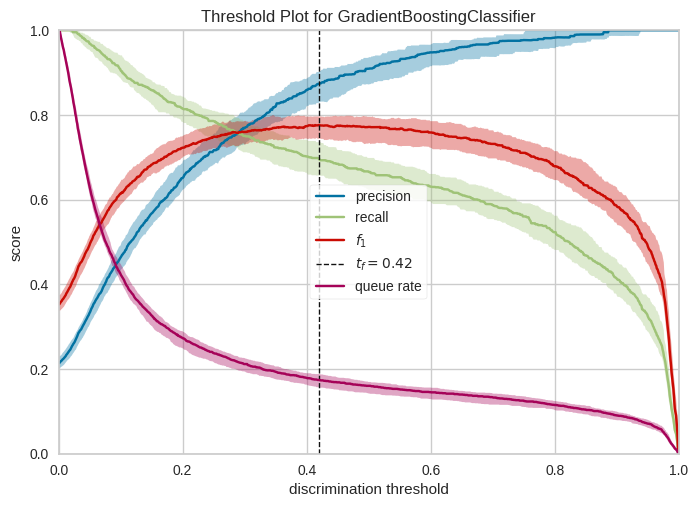

<Axes: title={'center': 'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [167]:
visualizer = DiscriminationThreshold(gbc, is_fitted=True, random_state=0, argmax='fscore')
visualizer.fit(X_test_t_p6[sel_vars_2], y_test)
visualizer.score(X_test_t_p6[sel_vars_2], y_test)
visualizer.show()

### *Adicionamos un cálculo de ROC*

In [168]:
from yellowbrick.classifier import ROCAUC

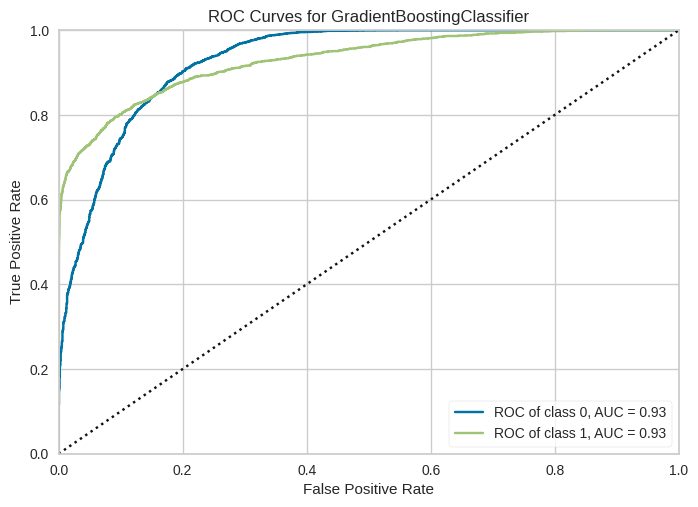

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [169]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t_p6[sel_vars_2], y_test)
visualizer2.score(X_test_t_p6[sel_vars_2], y_test)
visualizer2.show()

### ***Técnicas de balanceo***
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [170]:
X_y_train = pd.concat([X_train_t_p6[sel_vars_2].reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
print(count_nondefault,count_default)

17729 4962


In [171]:
X_y_train.shape

(22691, 8)

In [172]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]
print(nondefaults.shape)
print(defaults.shape)

(17729, 8)
(4962, 8)


In [173]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

(4962, 8)


In [174]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Verificamos los nros de defaults y no defaults
print(X_y_train_under['loan_status'].value_counts())

loan_status
0    4962
1    4962
Name: count, dtype: int64


In [175]:
X_y_train_under.shape

(9924, 8)

In [176]:
X_train_rus=X_y_train_under.drop(columns='loan_status')
X_train_rus.head()

,loan_percent_income,loan_int_rate,person_income,person_home_ownership,cb_person_default_on_file,loan_intent,person_emp_length
0,-0.214286,0.000000,-0.617284,0.503223,-0.206678,-0.486875,-0.8
1,-0.357143,-0.759797,2.098765,-0.669354,-0.206678,0.300535,2.2
2,1.642857,-1.132091,-0.864198,-1.192282,-0.206678,-0.261880,-0.2
3,0.071429,-0.080143,0.123457,0.503223,-0.206678,-0.486875,0.6
4,-0.285714,-1.132091,1.259259,-0.669354,-0.206678,0.300535,1.6


In [177]:
y_train_rus=X_y_train_under['loan_status']
y_train_rus.value_counts()

loan_status
0    4962
1    4962
Name: count, dtype: int64

In [178]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [179]:
# Modelo GBC con balanceo y sin balanceo
pred_test_gbc = search_gbc.predict_proba(X_test_t_p6[sel_vars_2])
pred_test_gbc2 = search_gbc2.predict_proba(X_test_t_p6[sel_vars_2])
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

Sin Balanceo Test roc_auc:  0.9300140288817251 GINI Test  0.8600280577634503
Con Balanceo Test roc_auc:  0.9301347520126606 GINI Test  0.8602695040253212


## **8. Calibración del Modelo:**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

In [ ]:
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, pred_test_gbc[:, 1])

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(search_gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t_p6[sel_vars_2], y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

In [ ]:
brier_score_loss(y_test, prob_sigmoid)

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

In [ ]:
# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(search_gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t_p6[sel_vars_2], y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

In [ ]:
brier_score_loss(y_test, prob_isotonic)

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

## **9. Unboxing de Modelos**

In [ ]:
fi=pd.Series(gbc.feature_importances_,index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t_p6[sel_vars_2])
print(shap_values_bin.shape)

In [ ]:
shap.plots.waterfall(shap_values_bin[0],max_display=10)

In [ ]:
import math
# el valor del log odds en la primera observación es
x=-1.877
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

## **10. Pickling del Modelo y del Pipeline del Feature Engineering**

In [ ]:
import pickle

In [ ]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pickle','wb') as fe_data_file:
     pickle.dump(pipe_3,fe_data_file)

In [ ]:
# Empaquetamos el modelo obtenido
with open('final_model.pickle','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

## ***FIN DEL TALLER, MUCHAS GRACIAS!!!***